In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

In [2]:
input = np.array([['AARTIIND',35,925.05],['ADANIENT',50,150.2],['CUMMINSIND',50,354.64],['ITC',100,187.56],['TATACONSUM',50,368.45],['TECHM',60,541.13],['UPL',25,382.7]])

In [3]:
input1 = {
    'Ticker':['AARTIIND','ADANIENT','CONCOR', 'CUMMINSIND','DEEPAKNTR','GUJGASLTD', 'ITC', 'TECHM', 'UPL'],
    'Quantity':[50,50,25,90,50,124,200,60,25],
    'Buy Price': [925.05,150.2,405.55,379.71,479.79,284.03,196.9,541.13,382.7]
}

In [1]:
input2 = {
    'Ticker':['aarti (AARTIIND )','(ADANIENT )','(CONCOR )', 'cummin (CUMMINSIND )','(DEEPAKNTR )','(GUJGASLTD )', '(ITC )', '(TECHM )', '(UPL )'],
    'Quantity':[50,50,25,90,50,124,200,60,25],
    'Buy Price': [925.05,150.2,405.55,379.71,479.79,284.03,196.9,541.13,382.7]
}

In [6]:
Tick = []
for i in range(len(input2['Ticker'])):
    Tick.append(input2['Ticker'][i])

In [7]:
Tick

['aarti (AARTIIND )',
 '(ADANIENT )',
 '(CONCOR )',
 'cummin (CUMMINSIND )',
 '(DEEPAKNTR )',
 '(GUJGASLTD )',
 '(ITC )',
 '(TECHM )',
 '(UPL )']

In [23]:
import re
res = []
for i in range(len(Tick)):
    res.append(Tick[i].split('(', 1)[1].split(' )')[0])

In [24]:
res

['AARTIIND',
 'ADANIENT',
 'CONCOR',
 'CUMMINSIND',
 'DEEPAKNTR',
 'GUJGASLTD',
 'ITC',
 'TECHM',
 'UPL']

In [4]:
inp = pd.DataFrame(input1, index = input1['Ticker'])
inp.drop(['Ticker'], axis=1)

,Quantity,Buy Price
AARTIIND,50,925.05
ADANIENT,50,150.20
CONCOR,25,405.55
CUMMINSIND,90,379.71
DEEPAKNTR,50,479.79
GUJGASLTD,124,284.03
ITC,200,196.90
TECHM,60,541.13
UPL,25,382.70


In [5]:
import datetime

In [6]:
#user input
start_date = '2014-1-1'
end_date = datetime.date.today()
bench = '^NSEI'

In [7]:
for i in range(len(inp)):
    inp['Quantity'][i] = float(inp['Quantity'][i])
    inp['Buy Price'][i] = float(inp['Buy Price'][i])

In [8]:
ticker_list = inp.index
n = len(ticker_list)
ticker = []
for i in range(n):
    ticker.append(ticker_list[i]+str('.NS'))

In [9]:
ticker

['AARTIIND.NS',
 'ADANIENT.NS',
 'CONCOR.NS',
 'CUMMINSIND.NS',
 'DEEPAKNTR.NS',
 'GUJGASLTD.NS',
 'ITC.NS',
 'TECHM.NS',
 'UPL.NS']

In [10]:
portfolio = pd.DataFrame()

In [11]:
for i in range(n):
    portfolio[ticker[i]] = pdr.DataReader(ticker[i],'yahoo',start = start_date, end = end_date)['Adj Close']

In [12]:
inp1 = inp

In [13]:
inp1['ltp'] = np.nan
for i in range(n):
    inp['ltp'].iloc[i] = portfolio[ticker[i]].iloc[-1]

In [14]:
inp1['buy_value'] = inp1['Quantity']*inp1['Buy Price']
inp1['now_value'] = inp1['Quantity']*inp1['ltp']

In [15]:
inp1['pnl'] = inp1['now_value']-inp1['buy_value']

In [16]:
total_pnl = np.sum(inp1['pnl'])
net_buy_value = np.sum(inp1['buy_value'])
net_now_value = np.sum(inp1['now_value'])

In [17]:
inp1['Weightage'] = inp1['now_value']/net_now_value

In [18]:
print('Current Value : ',net_now_value)
print('Invested Value : ',net_buy_value)
print('Profit / Loss : ',total_pnl)

Current Value :  249927.85083007812
Invested Value :  238699.66999999998
Profit / Loss :  11228.18083007813


In [19]:
log_ret = np.log(portfolio/portfolio.shift(1))

In [20]:
np.random.seed(42)
num_ports = 6000
all_weights = np.zeros((num_ports, len(portfolio.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(n))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum( (log_ret.mean() * weights * 252))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

In [21]:
print('Max Sharpe ratio= {}'.format(sharpe_arr.max()))
print('its location={}'.format(sharpe_arr.argmax()))
l = sharpe_arr.argmax()

Max Sharpe ratio= 1.4202124257154638
its location=1461


In [23]:
opt_weight = all_weights[l]

max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

In [24]:
inp1['Opt_weight'] = opt_weight
inp1['Opt_value'] = inp1['Opt_weight']*np.sum(inp1['now_value'])
inp1['Opt_quantity'] = (inp1['Opt_value']/inp1['ltp'])
inp1['Opt_quantity'] = inp1['Opt_quantity'].astype(int)

In [25]:
inp1

,Ticker,Quantity,Buy Price,ltp,buy_value,now_value,pnl,Weightage,Opt_weight,Opt_value,Opt_quantity
AARTIIND,AARTIIND,50,925.05,922.349976,46252.50,46117.498779,-135.001221,0.184523,0.375291,93795.624615,101
ADANIENT,ADANIENT,50,150.20,152.449997,7510.00,7622.499847,112.499847,0.030499,0.129443,32351.453866,212
CONCOR,CONCOR,25,405.55,421.000000,10138.75,10525.000000,386.250000,0.042112,0.022277,5567.598338,13
CUMMINSIND,CUMMINSIND,90,379.71,383.350006,34173.90,34501.500549,327.600549,0.138046,0.000922,230.527769,0
DEEPAKNTR,DEEPAKNTR,50,479.79,548.650024,23989.50,27432.501221,3443.001221,0.109762,0.172704,43163.614761,78
GUJGASLTD,GUJGASLTD,124,284.03,304.399994,35219.72,37745.599243,2525.879243,0.151026,0.118928,29723.343042,97
ITC,ITC,200,196.90,196.550003,39380.00,39310.000610,-69.999390,0.157285,0.030693,7671.078789,39
TECHM,TECHM,60,541.13,597.200012,32467.80,35832.000732,3364.200732,0.143369,0.088423,22099.261093,37
UPL,UPL,25,382.70,433.649994,9567.50,10841.249847,1273.749847,0.043378,0.061319,15325.348558,35


In [26]:
portfolio1 = portfolio*100/portfolio.iloc[0]

In [27]:
portfolio1.head()

,AARTIIND.NS,ADANIENT.NS,CONCOR.NS,CUMMINSIND.NS,DEEPAKNTR.NS,GUJGASLTD.NS,ITC.NS,TECHM.NS,UPL.NS
Date,,,,,,,,,
2014-01-01,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,100.000000,100.000000,100.000000
2014-01-02,97.525255,95.013909,100.504141,97.112922,101.132965,NaN,97.689522,99.343580,99.244156
2014-01-03,96.515151,92.409336,102.085629,97.440777,101.132965,NaN,97.627172,100.404790,100.831425
2014-01-06,97.373746,93.786035,102.127069,99.661579,101.632810,NaN,97.906330,99.329789,101.511726
2014-01-07,97.121206,90.027829,101.940607,100.444154,101.632810,NaN,98.232013,98.684535,101.662882


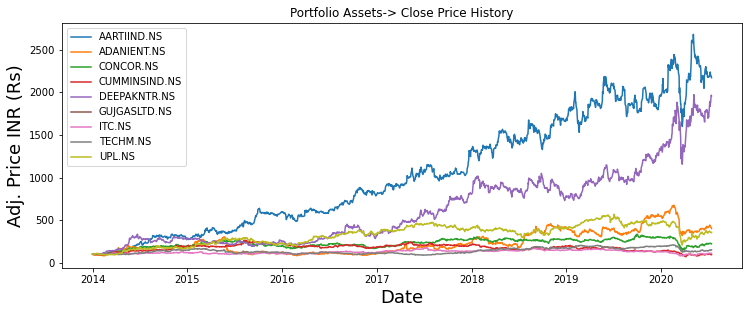

In [28]:
#create this graph with google charts.!
title = 'Portfolio Assets-> Close Price History'

my_stocks = portfolio1

plt.figure(figsize=(12.2,4.5)) 
# Loop through each stock
for c in my_stocks.columns.values:
  plt.plot( my_stocks[c],  label=c)
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj. Price INR (Rs)',fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [29]:
returns = portfolio.pct_change()
returns = returns.iloc[1:]

In [30]:
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,AARTIIND.NS,ADANIENT.NS,CONCOR.NS,CUMMINSIND.NS,DEEPAKNTR.NS,GUJGASLTD.NS,ITC.NS,TECHM.NS,UPL.NS
AARTIIND.NS,0.132435,0.039613,0.024762,0.021495,0.036643,0.014101,0.015720,0.011397,0.033104
ADANIENT.NS,0.039613,0.283422,0.046096,0.037653,0.055903,0.042732,0.028459,0.027427,0.057746
CONCOR.NS,0.024762,0.046096,0.111279,0.025231,0.034709,0.026446,0.018859,0.015835,0.031741
CUMMINSIND.NS,0.021495,0.037653,0.025231,0.098153,0.026625,0.019801,0.011003,0.011737,0.024978
DEEPAKNTR.NS,0.036643,0.055903,0.034709,0.026625,0.179133,0.030010,0.018088,0.022632,0.042856
GUJGASLTD.NS,0.014101,0.042732,0.026446,0.019801,0.030010,0.109632,0.019970,0.012676,0.027688
ITC.NS,0.015720,0.028459,0.018859,0.011003,0.018088,0.019970,0.073154,0.012651,0.020874
TECHM.NS,0.011397,0.027427,0.015835,0.011737,0.022632,0.012676,0.012651,0.089174,0.029885
UPL.NS,0.033104,0.057746,0.031741,0.024978,0.042856,0.027688,0.020874,0.029885,0.144693


In [31]:
weight = opt_weight

In [32]:
port_variance = np.dot(weight.T, np.dot(cov_matrix_annual, weight))
port_variance

0.05536186644111364

In [33]:
port_volatility = np.sqrt(port_variance)
port_volatility

0.23529102499057128

In [34]:
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weight) * 252
portfolioSimpleAnnualReturn

0.411626180527691

In [35]:
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100)+'%'
print('Optimized Statistics ->')
print("Expected annual return : "+ percent_ret)
print('Annual volatility/standard deviation/risk : '+percent_vols)
print('Annual variance : '+percent_var)

Optimized Statistics ->
Expected annual return : 41.0%
Annual volatility/standard deviation/risk : 24.0%
Annual variance : 6.0%


In [36]:
benchmark = pdr.DataReader(bench,'yahoo', start = start_date, end = end_date)['Adj Close']
benchmark = benchmark*100/benchmark[0]
benchmark.round(2)
benchmark.head()

Date
2014-01-02    100.000000
2014-01-03     99.839258
2014-01-06     99.522601
2014-01-07     99.053231
2014-01-08     99.251749
Name: Adj Close, dtype: float64

In [37]:
w1 = np.array(inp1['Weightage'])
w2 = np.array(inp1['Opt_weight'])

In [38]:
ret_data = portfolio.pct_change()[1:]
ret_data.head()

,AARTIIND.NS,ADANIENT.NS,CONCOR.NS,CUMMINSIND.NS,DEEPAKNTR.NS,GUJGASLTD.NS,ITC.NS,TECHM.NS,UPL.NS
Date,,,,,,,,,
2014-01-02,-0.024747,-0.049861,0.005041,-0.028871,0.011330,NaN,-0.023105,-0.006564,-0.007558
2014-01-03,-0.010357,-0.027413,0.015736,0.003376,0.000000,NaN,-0.000638,0.010682,0.015994
2014-01-06,0.008896,0.014898,0.000406,0.022791,0.004942,NaN,0.002859,-0.010707,0.006747
2014-01-07,-0.002594,-0.040072,-0.001826,0.007852,0.000000,NaN,0.003326,-0.006496,0.001489
2014-01-08,0.086844,-0.007439,0.023101,-0.006949,0.009836,NaN,0.000474,0.020259,-0.000743


In [39]:
weighted_returns1 = (w1 * ret_data)
weighted_returns2 = (w2 * ret_data)

In [40]:
port_ret1 = weighted_returns1.sum(axis=1)
port_ret2 = weighted_returns2.sum(axis=1)

In [41]:
cumulative_ret1 = (port_ret1 + 1).cumprod()*100
cumulative_ret2 = (port_ret2 + 1).cumprod()*100

In [42]:
cumulative_ret1 = cumulative_ret1*100/cumulative_ret1[0]
cumulative_ret2 = cumulative_ret2*100/cumulative_ret2[0]

In [43]:
cumret = pd.DataFrame(columns = ['orig_value','opt_value','benchmark'])
cumret['orig_value'] = cumulative_ret1
cumret['opt_value'] = cumulative_ret2
cumret['benchmark'] = benchmark


In [44]:
cumret.head()

,orig_value,opt_value,benchmark
Date,,,
2014-01-02,100.000000,100.000000,100.000000
2014-01-03,100.050636,99.482393,99.839258
2014-01-06,100.551800,100.049981,99.522601
2014-01-07,100.447512,99.392172,99.053231
2014-01-08,102.440158,102.930114,99.251749


In [45]:
import plotly
import plotly.graph_objects as go
import plotly.offline as py

import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [46]:
cum_ret1 = go.Scatter(x=cumret.index,
                         y=cumret['orig_value'], name = 'Your Portfolio')

cum_ret2 = go.Scatter(x=cumret.index,
                        y=cumret['opt_value'], name = 'Optimized Portfolio')

benchm = go.Scatter(x=cumret.index,
                        y=cumret['benchmark'], name = 'Benchmark')

In [47]:
layout = go.Layout(height=600, width=800,
                   title='Performance Plot',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Portfolio Performance')
                   )

fig = go.Figure(data=[cum_ret1, cum_ret2, benchm], layout=layout)
fig.update_layout(template="gridon")
py.iplot(fig)

In [48]:
#START OF THE MONTE CARLO PREDICTION.!

In [49]:
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [50]:
data_1 = cumret['orig_value']
data_2 = cumret['opt_value']

In [51]:
log_return1 = np.log(1 + data_1.pct_change())
log_return2 = np.log(1 + data_2.pct_change())

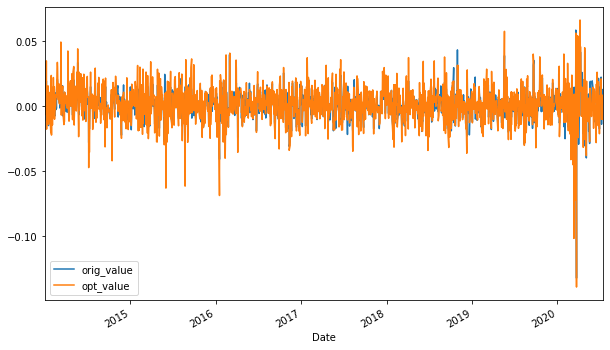

In [52]:
log_return1.plot(figsize = (10, 6))
log_return2.plot(figsize = (10, 6))
plt.legend()

In [53]:
u1 = log_return1.mean()
u2 = log_return2.mean()

In [54]:
var1 = log_return1.var()
var2 = log_return2.var()

In [55]:
drift1 = u1 - (0.5 * var1)
drift2 = u2 - (0.5 * var2)
drift1

0.0008752921854958292

In [56]:
stdev1 = log_return1.std()
stdev2 = log_return2.std()

In [57]:
# can be taken as user input
l = 500
#how many trading sessions in future
t_intervals = l
#no. of omte carlo simulations
iterations = 10

In [58]:
daily_returns1 = np.exp(drift1 + stdev1 * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns2 = np.exp(drift2 + stdev2 * norm.ppf(np.random.rand(t_intervals, iterations)))

In [59]:
S0 = data_1.iloc[-1]
S1 = data_2.iloc[-1]

In [60]:
price_list1 = np.zeros_like(daily_returns1)
price_list1[0] = S0
price_list2 = np.zeros_like(daily_returns2)
price_list2[0] = S1

In [61]:
for t in range(1, t_intervals):
    price_list1[t] = price_list1[t - 1] * daily_returns1[t]

In [62]:
high1 = max(price_list1[-1])
median1 = np.median(price_list1[-1])
low1 = min(price_list1[-1])
print('For your Current Portfolio -->')
print('100 Rs invested in {0} will be this much after 500 trading days from {1}'.format(start_date, end_date))
print('The max prediction: ', high1)
print('The median prediction: ', median1)
print('The lowest prediction: ', low1)

For your Current Portfolio -->
100 Rs invested in 2014-1-1 will be this much after 500 trading days from 2020-07-14
The max prediction:  1027.2582361602545
The median prediction:  774.6865097589275
The lowest prediction:  426.306079841868


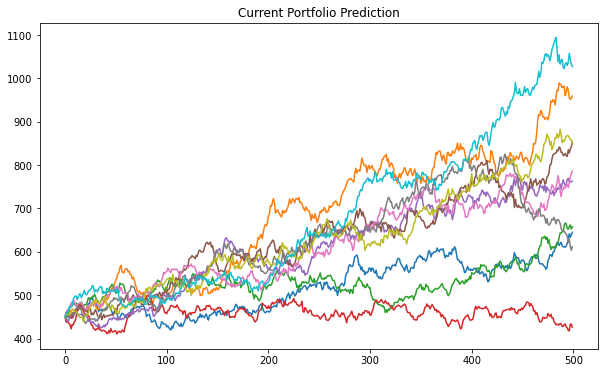

In [63]:
plt.figure(figsize=(10,6))
plt.plot(price_list1)
plt.title('Current Portfolio Prediction');

In [64]:
for t in range(1, t_intervals):
    price_list2[t] = price_list2[t - 1] * daily_returns2[t]

In [65]:
high2 = max(price_list2[-1])
median2 = np.median(price_list2[-1])
low2 = min(price_list2[-1])
print('For the Optimized Portfolio-->')
print('100 Rs invested in {0} will be this much after 500 trading days from {1}'.format(start_date, end_date))
print('The max prediction: ', high2)
print('The median prediction: ', median2)
print('The lowest prediction: ', low2)

For the Optimized Portfolio-->
100 Rs invested in 2014-1-1 will be this much after 500 trading days from 2020-07-14
The max prediction:  2784.758606789584
The median prediction:  2418.1461980757554
The lowest prediction:  1597.4257528014748


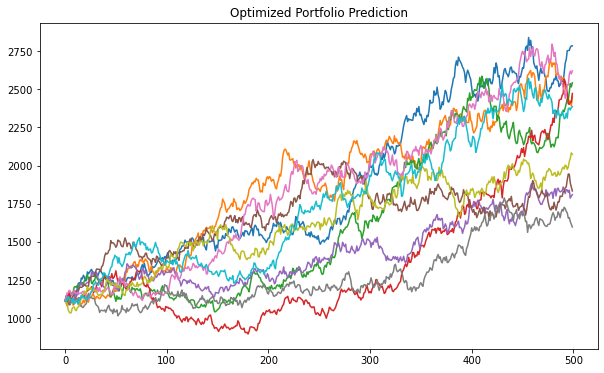

In [66]:
plt.figure(figsize=(10,6))
plt.plot(price_list2)
plt.title('Optimized Portfolio Prediction');

In [67]:
expected1 = pd.DataFrame(price_list1)
expected2 = pd.DataFrame(price_list2)
expected1['avg'] = expected1.mean(axis=1)
expected2['avg'] = expected2.mean(axis=1)

In [68]:
start = data_1.index[-1]
times = pd.date_range(start, periods=l, freq='D')
expected1.index = times
expected2.index = times

In [69]:
dfnew1 = pd.DataFrame(index = times)
dfnew1['value'] = expected1['avg'].values
dfnew2 = pd.DataFrame(index = times)
dfnew2['value'] = expected2['avg'].values

In [70]:
data_1.index = pd.to_datetime(data_1.index)
data_2.index = pd.to_datetime(data_2.index)

In [71]:
dfnew3 = dfnew2*data_1[-1]/dfnew2['value'][0]

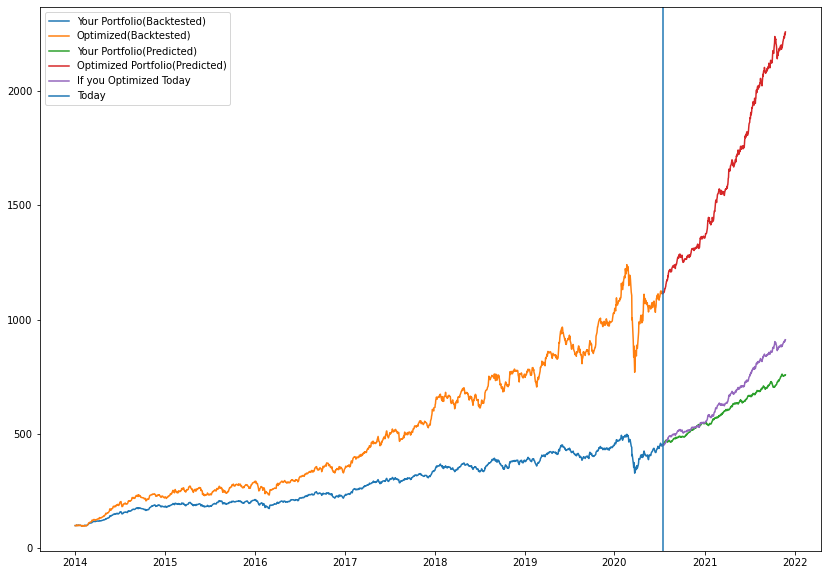

In [72]:
plt.figure(figsize=(14,10))
plt.plot(data_1)
plt.plot(data_2)
plt.plot(dfnew1)
plt.plot(dfnew2)
plt.plot(dfnew3)
plt.axvline(x = start)
plt.legend(['Your Portfolio(Backtested)','Optimized(Backtested)','Your Portfolio(Predicted)','Optimized Portfolio(Predicted)','If you Optimized Today','Today'])
plt.show()

In [73]:
#Calculating the maximum drawdown.! 
# Max Drawdown is the maximum downward % from previous 52w high, in the stock.!

In [74]:
cumret.head()

,orig_value,opt_value,benchmark
Date,,,
2014-01-02,100.000000,100.000000,100.000000
2014-01-03,100.050636,99.482393,99.839258
2014-01-06,100.551800,100.049981,99.522601
2014-01-07,100.447512,99.392172,99.053231
2014-01-08,102.440158,102.930114,99.251749


Maximum Drawdown of Original Portfolio -34.05389373894698 %


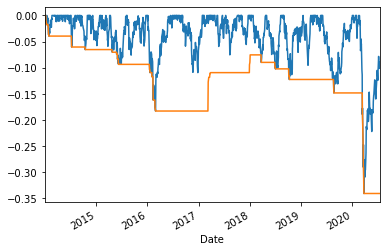

In [75]:
##ORIGINAL PORTFOLIO
window = 252


Roll_Max_c = cumret['orig_value'].rolling(window, min_periods=1).max()
Daily_Drawdown_c = cumret['orig_value']/Roll_Max_c - 1.0


Max_Daily_Drawdown_c = Daily_Drawdown_c.rolling(window, min_periods=1).min()

max_Drawdown_c = min(Daily_Drawdown_c)
print('Maximum Drawdown of Original Portfolio', max_Drawdown_c*100,'%')
# Plot the results
Daily_Drawdown_c.plot()
Max_Daily_Drawdown_c.plot()
plt.show()

Maximum Drawdown of Optimized Portfolio -37.91861204305164 %


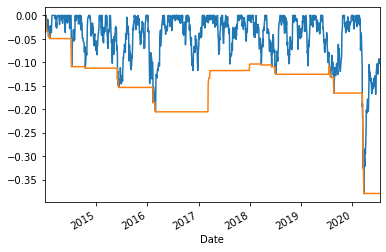

In [76]:
##OPTIMIZED PORTFOLIO
window = 252


Roll_Max_o = cumret['opt_value'].rolling(window, min_periods=1).max()
Daily_Drawdown_o = cumret['opt_value']/Roll_Max_o - 1.0


Max_Daily_Drawdown_o = Daily_Drawdown_o.rolling(window, min_periods=1).min()

max_Drawdown_o = min(Daily_Drawdown_o)
print('Maximum Drawdown of Optimized Portfolio', max_Drawdown_o*100,'%')
# Plot the results
Daily_Drawdown_o.plot()
Max_Daily_Drawdown_o.plot()
plt.show()

Maximum Drawdown of Benchmark -38.439852452742095 %


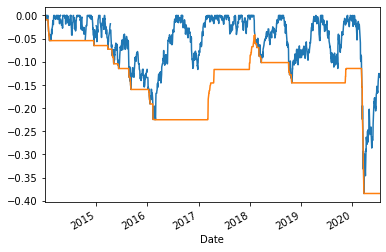

In [77]:
##BENCHMARK
window = 252


Roll_Max_b = cumret['benchmark'].rolling(window, min_periods=1).max()
Daily_Drawdown_b = cumret['benchmark']/Roll_Max_b - 1.0


Max_Daily_Drawdown_b = Daily_Drawdown_b.rolling(window, min_periods=1).min()

max_Drawdown_b = min(Daily_Drawdown_b)
print('Maximum Drawdown of Benchmark', max_Drawdown_b*100,'%')
# Plot the results
Daily_Drawdown_b.plot()
Max_Daily_Drawdown_b.plot()
plt.show()

In [78]:
#Yearly/Monthly Returns Bar Graph (original & optimized)

In [79]:
cumret.tail()

,orig_value,opt_value,benchmark
Date,,,
2020-07-08,450.731447,1114.262846,172.086353
2020-07-09,448.809135,1120.195407,173.817548
2020-07-10,448.384610,1115.083224,173.087773
2020-07-13,454.255781,1124.818542,NaN
2020-07-14,450.067108,1113.746298,171.043132


In [81]:
yearlyr = [cumret['orig_value'][0]]
yearlyd = [int(start_date[:4])]
for i in range(len(cumret)):
    if(int(cumret.index[i].year) > int(cumret.index[i-1].year)):
        yearlyr.append(cumret['orig_value'][i])
        yearlyd.append(cumret.index[i].year)
yearlyr.append(cumret['orig_value'][-1])

In [82]:
yearlyr = pd.DataFrame(yearlyr)

In [83]:
yr = yearlyr.pct_change()[1:]*100
yr.index = yearlyd
yr['Yearly Return'] = yr[0]

In [84]:
yr.drop([0], axis =1)

,Yearly Return
2014,82.077618
2015,17.329545
2016,8.595489
2017,46.896972
2018,13.184298
2019,18.217878
2020,-1.299499


In [109]:
from datetime import datetime
mnlyr = []#[cumret['orig_value'][0]]
mnlyr_m = []#[datetime.strptime(start_date, '%Y-%m-%d').month]
mnlyr_y = []#[datetime.strptime(start_date, '%Y-%m-%d').year]

In [110]:
for i in range(len(cumret)):
    if(int(cumret.index[i].month) != int(cumret.index[i-1].month)):
        mnlyr.append(cumret['orig_value'][i])
        mnlyr_y.append(cumret.index[i].year)
        mnlyr_m.append(cumret.index[i].month)
mnlyr.append(cumret['orig_value'][-1])

In [138]:
mnr = pd.DataFrame(columns = ['Year','Month','Value','Return'])

In [140]:
mnr['Year'] = mnlyr_y
mnr['Month'] = mnlyr_m
mnr['Value'] = mnlyr[:-1]
mnr['Return'] = mnr['Value'].pct_change().shift(-1)*100

In [141]:
mnrs= mnr[:-1]

In [142]:
#Monthly Returns
mnrs.drop(['Value'],axis=1)

,Year,Month,Return
0,2014,1,-1.112989
1,2014,2,11.744683
2,2014,3,8.544993
3,2014,4,4.999362
4,2014,5,15.185212
5,2014,6,7.863843
6,2014,7,0.106992
7,2014,8,8.865616
8,2014,9,1.884058
9,2014,10,3.491083
